# **VISIT LOG DATASET**

In [108]:
#IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [92]:
#PACKAGE UNTUK CONNECT G-DRIVE N G-COLLAB 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
file_path = "/content/drive/MyDrive/Dataset/Visit_Log.xlsx"
df = pd.read_excel(file_path)
df 

,Date,Region,Area,Type,Name,Leader,Outlet Name,In,Out,Latitude,Longitude
0,2022-04-21,WEST REGION,JABAR 1 - BANDUNG,SPG,IDAH,NUR PRASETIO,0000,12:33:24,12:33:29,-6.963126,107.559065
1,2022-04-14,WEST REGION,JABAR 1 - BANDUNG,SPG,IDAH,NUR PRASETIO,0000YOONA,06:46:24,NaN,-6.935711,107.599384
2,2022-04-01,CENTRAL REGION,JATENG 1 - SEMARANG,TEAM LEADER,SRI WAHYUNI,SRI WAHYUNI,24303,09:18:18,13:01:05,-6.850573,109.108852
3,2022-09-03,CENTRAL REGION,KALIMANTAN,SMD,RAHMAD FIRDAUS,TONY WIRANTO,888 MINI MARKET,08:41:39,08:52:00,-3.305164,114.578834
4,2022-08-15,CENTRAL REGION,KALIMANTAN,SMD,RAHMAD FIRDAUS,TONY WIRANTO,888 MINI MARKET,15:22:40,15:57:30,-3.323416,114.568989
...,...,...,...,...,...,...,...,...,...,...,...
32560,2022-04-16,CENTRAL REGION,JATENG 1 - SEMARANG,SPT,DANI TRI SAPUTRO,SISWANTI,ZAM-ZAM PATIMURA,12:14:08,NaN,-7.322211,110.503904
32561,2022-04-08,WEST REGION,JABAR 2 - CIREBON,TEAM LEADER,YAYAT HIDAYAT,DESI ARYANI,ZIANMART,14:10:33,14:25:02,-7.337894,108.195440
32562,2022-05-17,WEST REGION,JABAR 2 - CIREBON,TEAM LEADER,YAYAT HIDAYAT,DESI ARYANI,ZIANMART,12:55:22,13:13:36,-7.337884,108.195509
32563,2022-03-30,CENTRAL REGION,JATENG 1 - SEMARANG,SPT,NAIM,MUSTHOFA,ZUBAIDI,12:10:09,12:11:34,-6.716242,111.190459


# **DATA PREPROCESSING**
Data preprosessing pada dataset ini untu transform hurf menjadi lower case agar lebih akurat setelah untuk analisis. 


*   Contoh Outlet Name : Toko Majapahit / toko maJapahIt diasumsikaan adalah outlet yang sama



In [94]:
df = df.applymap(lambda s: s.lower() if isinstance(s, str) else s)
df

,Date,Region,Area,Type,Name,Leader,Outlet Name,In,Out,Latitude,Longitude
0,2022-04-21,west region,jabar 1 - bandung,spg,idah,nur prasetio,0000,12:33:24,12:33:29,-6.963126,107.559065
1,2022-04-14,west region,jabar 1 - bandung,spg,idah,nur prasetio,0000yoona,06:46:24,NaN,-6.935711,107.599384
2,2022-04-01,central region,jateng 1 - semarang,team leader,sri wahyuni,sri wahyuni,24303,09:18:18,13:01:05,-6.850573,109.108852
3,2022-09-03,central region,kalimantan,smd,rahmad firdaus,tony wiranto,888 mini market,08:41:39,08:52:00,-3.305164,114.578834
4,2022-08-15,central region,kalimantan,smd,rahmad firdaus,tony wiranto,888 mini market,15:22:40,15:57:30,-3.323416,114.568989
...,...,...,...,...,...,...,...,...,...,...,...
32560,2022-04-16,central region,jateng 1 - semarang,spt,dani tri saputro,siswanti,zam-zam patimura,12:14:08,NaN,-7.322211,110.503904
32561,2022-04-08,west region,jabar 2 - cirebon,team leader,yayat hidayat,desi aryani,zianmart,14:10:33,14:25:02,-7.337894,108.195440
32562,2022-05-17,west region,jabar 2 - cirebon,team leader,yayat hidayat,desi aryani,zianmart,12:55:22,13:13:36,-7.337884,108.195509
32563,2022-03-30,central region,jateng 1 - semarang,spt,naim,musthofa,zubaidi,12:10:09,12:11:34,-6.716242,111.190459


# **Cek data yang kosong/ null data**

Disini terdapat 792 data nama leader yang tidak dimasukan. Saya akan remove missing row agar tidak mempengaruhi hasil analisis

In [95]:
#Cek missing data
null_data= df.isnull().sum()
null_data

Date              0
Region            0
Area              0
Type              0
Name              0
Leader          792
Outlet Name       0
In                0
Out            2121
Latitude          0
Longitude         0
dtype: int64

In [96]:
#hapus missing data pada coloum leader saja karena coloum put tidak akan berpengaruh
df = df.dropna(subset=['Leader'])
df

,Date,Region,Area,Type,Name,Leader,Outlet Name,In,Out,Latitude,Longitude
0,2022-04-21,west region,jabar 1 - bandung,spg,idah,nur prasetio,0000,12:33:24,12:33:29,-6.963126,107.559065
1,2022-04-14,west region,jabar 1 - bandung,spg,idah,nur prasetio,0000yoona,06:46:24,NaN,-6.935711,107.599384
2,2022-04-01,central region,jateng 1 - semarang,team leader,sri wahyuni,sri wahyuni,24303,09:18:18,13:01:05,-6.850573,109.108852
3,2022-09-03,central region,kalimantan,smd,rahmad firdaus,tony wiranto,888 mini market,08:41:39,08:52:00,-3.305164,114.578834
4,2022-08-15,central region,kalimantan,smd,rahmad firdaus,tony wiranto,888 mini market,15:22:40,15:57:30,-3.323416,114.568989
...,...,...,...,...,...,...,...,...,...,...,...
32560,2022-04-16,central region,jateng 1 - semarang,spt,dani tri saputro,siswanti,zam-zam patimura,12:14:08,NaN,-7.322211,110.503904
32561,2022-04-08,west region,jabar 2 - cirebon,team leader,yayat hidayat,desi aryani,zianmart,14:10:33,14:25:02,-7.337894,108.195440
32562,2022-05-17,west region,jabar 2 - cirebon,team leader,yayat hidayat,desi aryani,zianmart,12:55:22,13:13:36,-7.337884,108.195509
32563,2022-03-30,central region,jateng 1 - semarang,spt,naim,musthofa,zubaidi,12:10:09,12:11:34,-6.716242,111.190459


# **BASIC KNOWLEDGE**
Terdapat 
*   15 Orang Leader
*   145 Karyawan (160 karywan - 15 Leader = **145**)
*   7118 Outlet
*   6 Type Karywan(dikurangi Team Lead)
*   5 Area







In [97]:
df.nunique()

Date             186
Region             2
Area               5
Type               6
Name             160
Leader            15
Outlet Name     7118
In             20582
Out            20984
Latitude       29913
Longitude      30142
dtype: int64

# **PERSENTASE SEBARAN AREA**

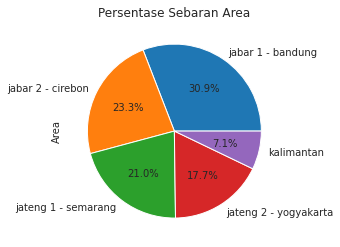

In [139]:
# Count Area
area_counts = df['Area'].value_counts()

# Create a pie chart
area_counts.plot.pie(autopct='%1.1f%%')

# Add a title to the chart
plt.title('Persentase Sebaran Area')
plt.show()

# **CALCULATE TIME SPENT KARYWAN/ USER**
Hasil kalkulasi didapatkan dari waktu login dan waktu logout

In [118]:
#CREATE COLUMN BERAPA LAMA KARYWAN SPENT TIME(VISIT)
df_time =df.loc[:, ['Name', 'Leader', 'In', 'Out']]
df_time = df.dropna(subset=['Out'])
df_time

# Conver dttpe menjadi datetime
df_time['In'] = pd.to_datetime(df_time['In'])
df_time['Out'] = pd.to_datetime(df_time['Out'])

# Calculate dalma satuan menit
df_time['Time Spent(Minute)'] = (df_time['Out'] - df_time['In']).dt.total_seconds() / 60

average_time = df_time['Time Spent(Minute)'].mean()
print('Rata-rata waktu Total karyAwan visit-log:', average_time, 'minutes')

Rata-rata waktu karywa visit-log: 163.46018633888983 minutes


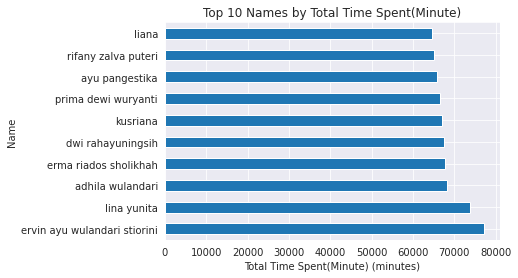

In [136]:
#vizualisation
# Group the data by the name and calculate the total time spent(Minute)
df_grouped = df_time.groupby('Name')['Time Spent(Minute)'].sum().reset_index()
df_grouped = df_grouped.sort_values('Time Spent(Minute)', ascending=False)
df_grouped= df_grouped.head(10)

# Calculate the total time spent by each name
df_grouped = df_grouped.groupby('Name')['Time Spent(Minute)'].sum()

# Select hanya top 10
df_grouped = df_grouped.nlargest(10)

# Convert the data to a numeric format
df_grouped = df_grouped.astype(float)
df_grouped = df_grouped.transpose()

# Visualization
df_grouped.plot(kind='barh')  
plt.title('Top 10 Names by Total Time Spent(Minute)')
plt.xlabel('Total Time Spent(Minute) (minutes)')
plt.ylabel('Name')
plt.show()

# **LEADER DAN JUMLAH OUTLET**

Top 3 Leader yang memiliki outler terbanyak:

1. ROBANA (1787 Outlet)
2. EGI AHMAD TAUFIK (1367 Outlet)
3. BETI MARYANI (920)







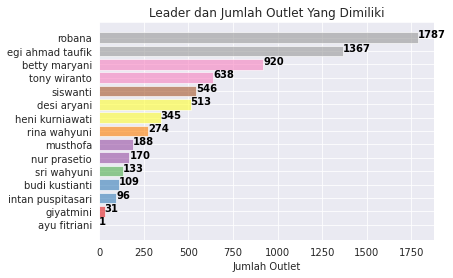

In [98]:
#LEADER DAN JUMLAH OUTLET

#define dataset baru
df_outlet = df[['Leader', 'Outlet Name']]
df_outlet = df_outlet.drop_duplicates(subset=['Outlet Name'])
df_outlet 

#groupby berdasarkan leader and order by descending
df_outlet = df_outlet.groupby('Leader').count()
df_outlet = df_outlet.sort_values('Outlet Name', ascending=True)
df_outlet

#setting warna visualization
cmap = plt.get_cmap('Set1')
colors = [cmap(i) for i in np.linspace(0, 1, len(df_outlet))]

#Barplot visualization
plt.barh(df_outlet.index, df_outlet['Outlet Name'], color=colors, alpha=0.6)
plt.xlabel('Jumlah Outlet')
plt.title('Leader dan Jumlah Outlet Yang Dimiliki')

# Add total number pada bagian ujung
for i, v in enumerate(df_outlet['Outlet Name']):
    plt.text(v + 0.2, i, str(v), color='black', fontweight='bold')

plt.show()

# **LEADER DAN JUMLAH KARYAWAN YANG MELAKUKAN VISIT LOG**

Top 3 Leaderyang memiliki karywan terbanyak melakukan visit log:

1. ROBANA (19 Karyawan)
2. SISWANTI (14 Karyawan)
3. HENI, EGI & BETI (13 Karywan)







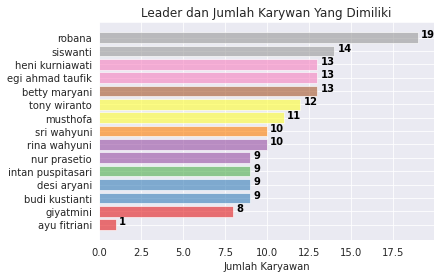

In [99]:
#LEADER DAN JUMLAH KARYWAN

#define dataset baru
df_leader = df[['Leader','Name']]
df_leader = df_leader.drop_duplicates(subset=['Name'])

#groupby berdasarkan leader and order by descending
df_leader = df_leader.groupby('Leader').count()
df_leader = df_leader.sort_values('Name', ascending=True)

#setting warna visualization
cmap = plt.get_cmap('Set1')
colors = [cmap(i) for i in np.linspace(0, 1, len(df_leader))]

#Barplot visualization
plt.barh(df_leader.index, df_leader['Name'], color=colors, alpha=0.6)
plt.xlabel('Jumlah Karyawan')
plt.title('Leader dan Jumlah Karywan Yang Dimiliki')

# Add total number pada bagian ujung
for i, v in enumerate(df_leader['Name']):
    plt.text(v + 0.2, i, str(v), color='black', fontweight='bold')

plt.show()

# **VISIT LOG KARYAWAN PER TEAM LEADER**

# **Visit Log Karywan Dibawah Pimpinan ROBANA (Team Leader)**
Karyawan dibawah pimpinan ROBANA paling banyak melakukan visit log:
1. Muhammad Fajar Al Imron (1941 kali)
2. Indah Rachmasari (955)
3. Siti Juleha (536)
4. dst

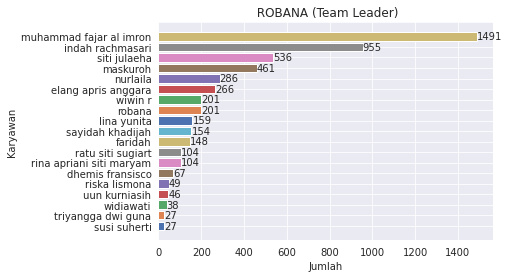

In [100]:
#1. VISIT LOG FREKUENSI ROBANA
df_robana = df[['Leader','Name']]

#Filter leader yang akan di analisis
df_robana = df_robana[df_robana['Leader']=='robana']
df_robana= df_robana['Name'].value_counts().sort_values(ascending=True)

#Visualization
sns.set_style('darkgrid')
colors = sns.color_palette('deep')
plt.barh(df_robana.index, df_robana.values, color=colors)
plt.title(' ROBANA (Team Leader)')
plt.xlabel('Jumlah')
plt.ylabel('Karyawan')

# Add total number pada bagian ujung barplot
ax = plt.gca()
for i, count in enumerate(df_robana.values):
    ax.text(count + 0.1, i, str(count), ha='left', va='center')

plt.show()

# **Visit Log Karywan Dibawah Pimpinan SISWANTI (Team Leader)**
Karyawan dibawah pimpinan SIWANTI paling banyak melakukan visit log:
1. Meylani Wulandari (955 kali)
2. Kana Karima Sakti (354)
3. Siswanti (243)
4. dst

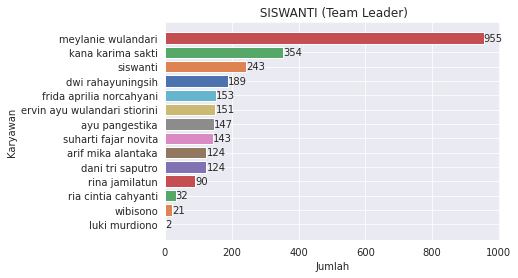

In [101]:
#2. VISIT LOG FREKUENSI SISWANTI
df_robana = df[['Leader','Name']]

#Filter leader yang akan di analisis
df_robana = df_robana[df_robana['Leader']=='siswanti']
df_robana= df_robana['Name'].value_counts().sort_values(ascending=True)

#Visualization
sns.set_style('darkgrid')
colors = sns.color_palette('deep')
plt.barh(df_robana.index, df_robana.values, color=colors)
plt.title(' SISWANTI (Team Leader)')
plt.xlabel('Jumlah')
plt.ylabel('Karyawan')

# Add total number pada bagian ujung barplot
ax = plt.gca()
for i, count in enumerate(df_robana.values):
    ax.text(count + 0.1, i, str(count), ha='left', va='center')

plt.show()

# **Visit Log Karywan Dibawah Pimpinan HENI KURNIAWATI (Team Leader)**


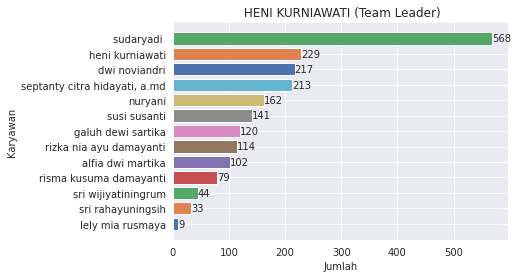

In [102]:
#3. VISIT LOG FREKUENSI HENI KURNIAWATI
df_robana = df[['Leader','Name']]

#Filter leader yang akan di analisis
df_robana = df_robana[df_robana['Leader']=='heni kurniawati']
df_robana= df_robana['Name'].value_counts().sort_values(ascending=True)

#Visualization
sns.set_style('darkgrid')
colors = sns.color_palette('deep')
plt.barh(df_robana.index, df_robana.values, color=colors)
plt.title(' HENI KURNIAWATI (Team Leader)')
plt.xlabel('Jumlah')
plt.ylabel('Karyawan')

# Add total number pada bagian ujung barplot
ax = plt.gca()
for i, count in enumerate(df_robana.values):
    ax.text(count + 0.1, i, str(count), ha='left', va='center')

plt.show()

# **Visit Log Karywan Dibawah Pimpinan EGI AHMAD T. (Team Leader)**


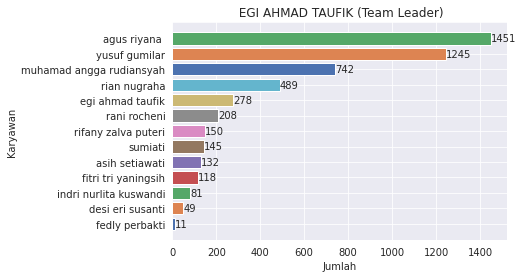

In [103]:
#4. VISIT LOG FREKUENSI EGI AHMAD TAUFIK
df_robana = df[['Leader','Name']]

#Filter leader yang akan di analisis
df_robana = df_robana[df_robana['Leader']=='egi ahmad taufik']
df_robana= df_robana['Name'].value_counts().sort_values(ascending=True)

#Visualization
sns.set_style('darkgrid')
colors = sns.color_palette('deep')
plt.barh(df_robana.index, df_robana.values, color=colors)
plt.title(' EGI AHMAD TAUFIK (Team Leader)')
plt.xlabel('Jumlah')
plt.ylabel('Karyawan')

# Add total number pada bagian ujung barplot
ax = plt.gca()
for i, count in enumerate(df_robana.values):
    ax.text(count + 0.1, i, str(count), ha='left', va='center')

plt.show()

# **Visit Log Karywan Dibawah Pimpinan BETTY MARYANI (Team Leader)**


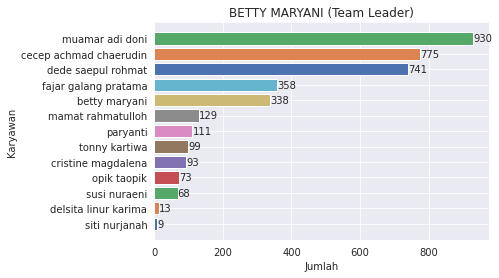

In [104]:
#5. VISIT LOG FREKUENSI BETTY MARYANI
df_robana = df[['Leader','Name']]

#Filter leader yang akan di analisis
df_robana = df_robana[df_robana['Leader']=='betty maryani']
df_robana= df_robana['Name'].value_counts().sort_values(ascending=True)

#Visualization
sns.set_style('darkgrid')
colors = sns.color_palette('deep')
plt.barh(df_robana.index, df_robana.values, color=colors)
plt.title('BETTY MARYANI (Team Leader)')
plt.xlabel('Jumlah')
plt.ylabel('Karyawan')

# Add total number pada bagian ujung barplot
ax = plt.gca()
for i, count in enumerate(df_robana.values):
    ax.text(count + 0.1, i, str(count), ha='left', va='center')

plt.show()